## 1. Importing Libraries
The notebook begins by importing essential Python libraries for data analysis and visualization.

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##2. Loading the Dataset
The dataset is loaded from a CSV file named DataScience.csv

In [252]:
df = pd.read_csv('DataScience.csv')
df.head()

,Country,State,District,Year,Month,Reservoir Basin Name,Reservoir Name,"Full Reservoir Level (Frl) Capacity (UOM:BCM(BillionCubicMeter)), Scaling Factor:1","Reservoir Water Level (UOM:M(Meter)), Scaling Factor:1","Reservoir Water Storage (UOM:BCM(BillionCubicMeter)), Scaling Factor:1"
0,India,Andhra Pradesh,Anantapur,"Calendar Year (Jan - Dec), 2021","May, 2021",PENNAR,GODDAMVARIPALLI SR3,0.01,NaN,NaN
1,India,Andhra Pradesh,Anantapur,"Calendar Year (Jan - Dec), 2021","May, 2021",PENNAR,CHITRAVATI BALANCING RESERVOIR,0.28,297.92,0.01
2,India,Andhra Pradesh,Anantapur,"Calendar Year (Jan - Dec), 2021","May, 2021",PENNAR,MID PENNAR RESERVOIR,0.15,356.94,0.00
3,India,Andhra Pradesh,Anantapur,"Calendar Year (Jan - Dec), 2021","May, 2021",PENNAR,PENNA AHOBILAM BALANCING RESERVOIR,0.31,431.78,0.01
4,India,Andhra Pradesh,Anantapur,"Calendar Year (Jan - Dec), 2021","May, 2021",PENNAR,PENNAR KUMUDWATHI PROJECT (ANICUT),NaN,NaN,NaN


##3. Initial Data Exploration
The notebook performs initial exploration to understand dataset dimensions, data types, and missing values.

In [253]:
print(df.shape)

(53625, 10)


In [254]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53625 entries, 0 to 53624
Data columns (total 10 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Country                                                                             53625 non-null  object 
 1   State                                                                               53625 non-null  object 
 2   District                                                                            53625 non-null  object 
 3   Year                                                                                53625 non-null  object 
 4   Month                                                                               53625 non-null  object 
 5   Reservoir Basin Name                                                                53625 non-n

In [255]:
print(df.isnull().sum())

Country                                                                                   0
State                                                                                     0
District                                                                                  0
Year                                                                                      0
Month                                                                                     0
Reservoir Basin Name                                                                      0
Reservoir Name                                                                            0
Full Reservoir Level (Frl) Capacity (UOM:BCM(BillionCubicMeter)), Scaling Factor:1      875
Reservoir Water Level (UOM:M(Meter)), Scaling Factor:1                                26049
Reservoir Water Storage (UOM:BCM(BillionCubicMeter)), Scaling Factor:1                26048
dtype: int64


##4. Checking for Duplicates
The notebook checks for duplicate rows.

In [256]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


##5. Data Cleaning
Renaming Columns:
The dataset has long column names, which are renamed for convenience.

Filling Missing Values: Missing Values are filled with median

In [257]:
df.rename(columns={
    'Full Reservoir Level (Frl) Capacity (UOM:BCM(BillionCubicMeter)), Scaling Factor:1': 'Full_Reservoir_Capacity_BCM',
    'Reservoir Water Level (UOM:M(Meter)), Scaling Factor:1': 'Reservoir_Water_Level_M',
    'Reservoir Water Storage (UOM:BCM(BillionCubicMeter)), Scaling Factor:1': 'Reservoir_Water_Storage_BCM'
}, inplace=True)

df.columns

Index(['Country', 'State', 'District', 'Year', 'Month', 'Reservoir Basin Name',
       'Reservoir Name', 'Full_Reservoir_Capacity_BCM',
       'Reservoir_Water_Level_M', 'Reservoir_Water_Storage_BCM'],
      dtype='object')

In [258]:
missing_percent = df.isnull().mean() * 100
print(missing_percent)

Country                         0.000000
State                           0.000000
District                        0.000000
Year                            0.000000
Month                           0.000000
Reservoir Basin Name            0.000000
Reservoir Name                  0.000000
Full_Reservoir_Capacity_BCM     1.631702
Reservoir_Water_Level_M        48.576224
Reservoir_Water_Storage_BCM    48.574359
dtype: float64


In [259]:
#Impute remaining missing with median
df['Reservoir_Water_Level_M'] = df['Reservoir_Water_Level_M'].fillna(df['Reservoir_Water_Level_M'].median())
df['Reservoir_Water_Storage_BCM'] = df['Reservoir_Water_Storage_BCM'].fillna(df['Reservoir_Water_Storage_BCM'].median())
df['Full_Reservoir_Capacity_BCM'] = df['Full_Reservoir_Capacity_BCM'].fillna(df['Full_Reservoir_Capacity_BCM'].median())

In [260]:
print(df.isnull().sum())

Country                        0
State                          0
District                       0
Year                           0
Month                          0
Reservoir Basin Name           0
Reservoir Name                 0
Full_Reservoir_Capacity_BCM    0
Reservoir_Water_Level_M        0
Reservoir_Water_Storage_BCM    0
dtype: int64


##6. Feature Engineering / Preprocessing
Extracting Year and Month: The Year is extracted as an integer and Month is converted to a proper datetime format.

In [261]:
df['Year'] = df['Year'].str.extract(r'(\d{4})').astype(int)

In [262]:
df['Month'] = pd.to_datetime(df['Month'], format='%b, %Y', errors='coerce')

In [263]:
df[['Year', 'Month']].head()

,Year,Month
0,2021,2021-05-01
1,2021,2021-05-01
2,2021,2021-05-01
3,2021,2021-05-01
4,2021,2021-05-01


In [264]:
df.to_csv('Cleaned_DATA.csv', index=False)

##7. Descriptive Summary
The dataset summary is generated.

In [265]:
df.describe()

,Year,Month,Full_Reservoir_Capacity_BCM,Reservoir_Water_Level_M,Reservoir_Water_Storage_BCM
count,53625.000000,4719,53625.000000,53625.000000,53625.000000
mean,2015.720000,2016-04-30 15:16:21.818181632,36.026746,196.888303,0.195662
min,2011.000000,2011-05-01 00:00:00,0.000000,0.000000,0.000000
25%,2013.000000,2013-05-01 00:00:00,0.100000,139.190000,0.020000
50%,2016.000000,2016-05-01 00:00:00,1.785000,143.750000,0.020000
75%,2018.000000,2019-05-01 00:00:00,8.840000,151.180000,0.020000
max,2021.000000,2021-05-01 00:00:00,7414.290000,1002.790000,9.720000
std,3.013597,NaN,367.648471,172.001115,0.649604


In [266]:
df['Storage_Efficiency_%'] = (df['Reservoir_Water_Storage_BCM'] / df['Full_Reservoir_Capacity_BCM']) * 100

In [267]:
summary = df.groupby('State').agg({
    'Reservoir_Water_Storage_BCM':'mean',
    'Full_Reservoir_Capacity_BCM':'mean',
    'Storage_Efficiency_%':'mean'
}).sort_values(by='Reservoir_Water_Storage_BCM', ascending=False)

summary.head()

,Reservoir_Water_Storage_BCM,Full_Reservoir_Capacity_BCM,Storage_Efficiency_%
State,,,
Himachal Pradesh,2.134027,4.156667,45.758237
Madhya Pradesh,1.750222,3.155556,46.676749
Punjab,1.221920,2.340000,52.218803
Odisha,1.066460,1.918750,61.209765
Uttarakhand,0.863733,1.693333,42.573471


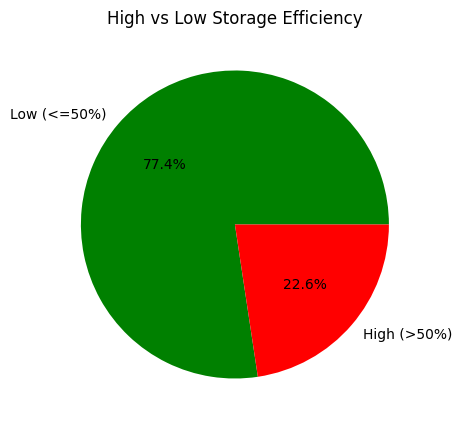

In [268]:
df['Efficiency_Category'] = np.where(df['Storage_Efficiency_%']>50, 'High (>50%)', 'Low (<=50%)')
efficiency_counts = df['Efficiency_Category'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(efficiency_counts, labels=efficiency_counts.index, autopct='%1.1f%%', colors=['green','red'])
plt.title("High vs Low Storage Efficiency")
plt.show()

In [269]:
print("Top 5 States by Average Storage:\n",
      df.groupby('State')['Reservoir_Water_Storage_BCM'].mean().nlargest(5))

print("Correlation between Capacity & Storage:",
      df[['Full_Reservoir_Capacity_BCM','Reservoir_Water_Storage_BCM']].corr().iloc[0,1])

Top 5 States by Average Storage:
 State
Himachal Pradesh    2.134027
Madhya Pradesh      1.750222
Punjab              1.221920
Odisha              1.066460
Uttarakhand         0.863733
Name: Reservoir_Water_Storage_BCM, dtype: float64
Correlation between Capacity & Storage: 0.10680816607770267


##8. Univariate Analysis
The notebook likely includes several plots such as barplots and histogramslink text to analyze individual variables.

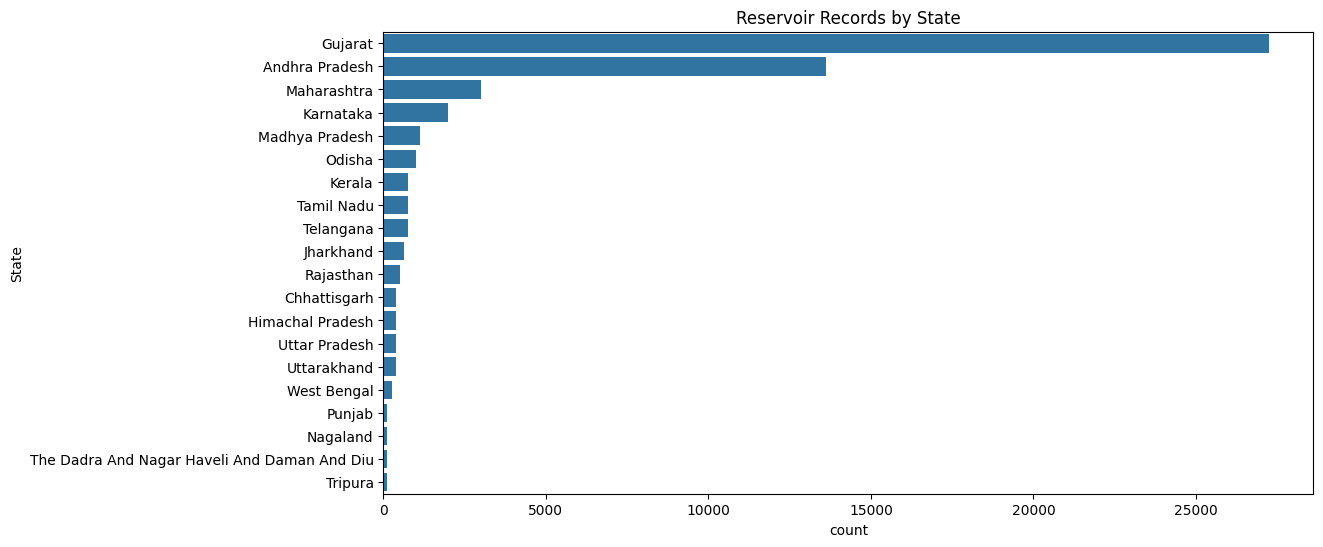

In [270]:
plt.figure(figsize=(12,6))
sns.countplot(y=df['State'], order=df['State'].value_counts().index)
plt.title("Reservoir Records by State")
plt.show()

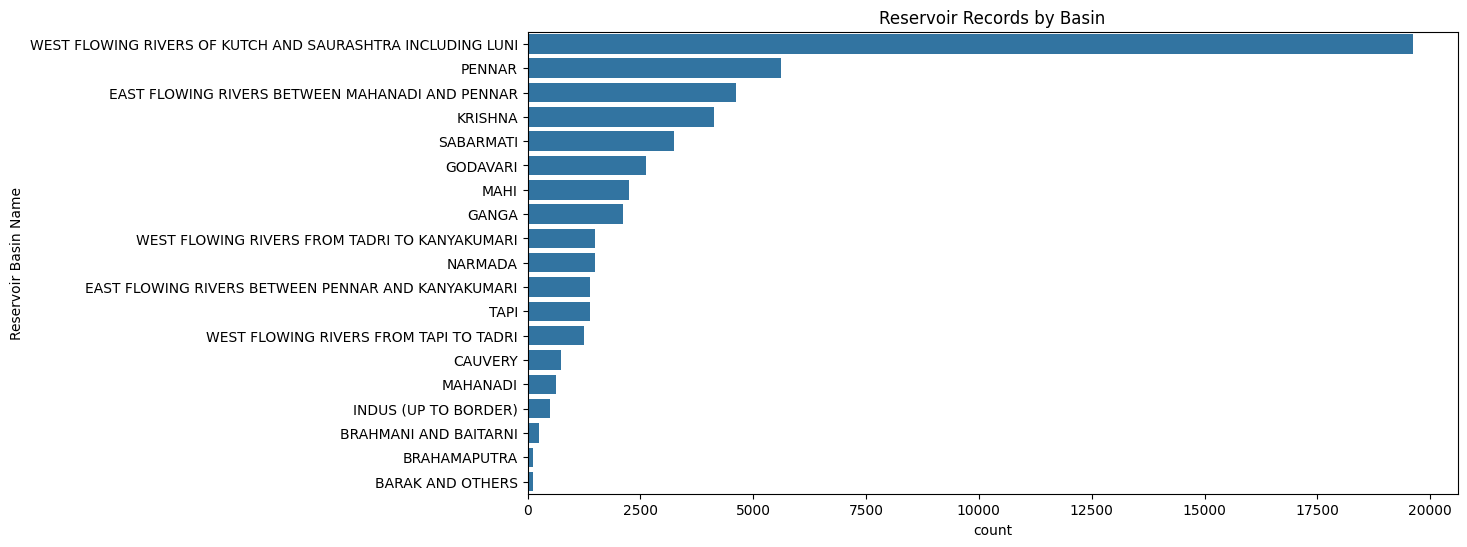

In [271]:
plt.figure(figsize=(12,6))
sns.countplot(y=df['Reservoir Basin Name'], order=df['Reservoir Basin Name'].value_counts().index)
plt.title("Reservoir Records by Basin")
plt.show()

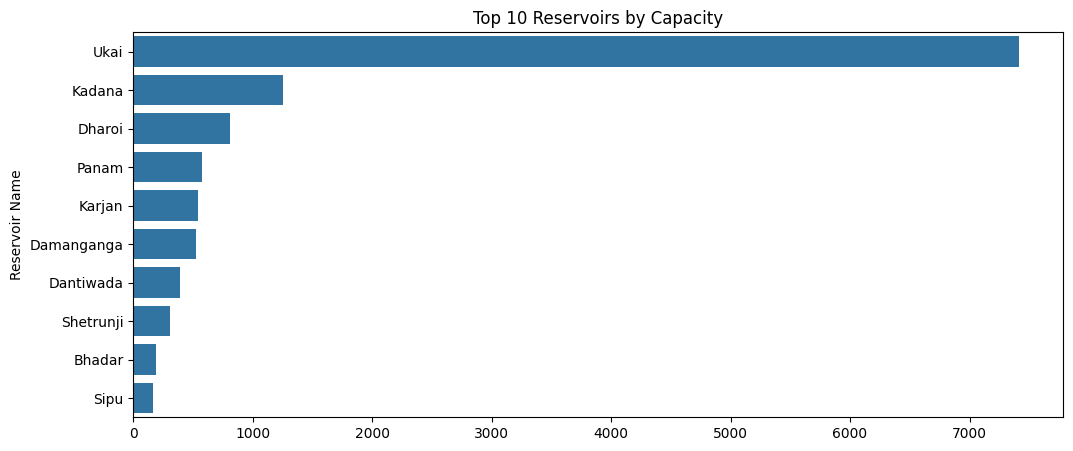

In [272]:
top_reservoirs = df.groupby('Reservoir Name')['Full_Reservoir_Capacity_BCM'].mean().nlargest(10)

plt.figure(figsize=(12,5))
sns.barplot(x=top_reservoirs.values, y=top_reservoirs.index)
plt.title("Top 10 Reservoirs by Capacity")
plt.show()

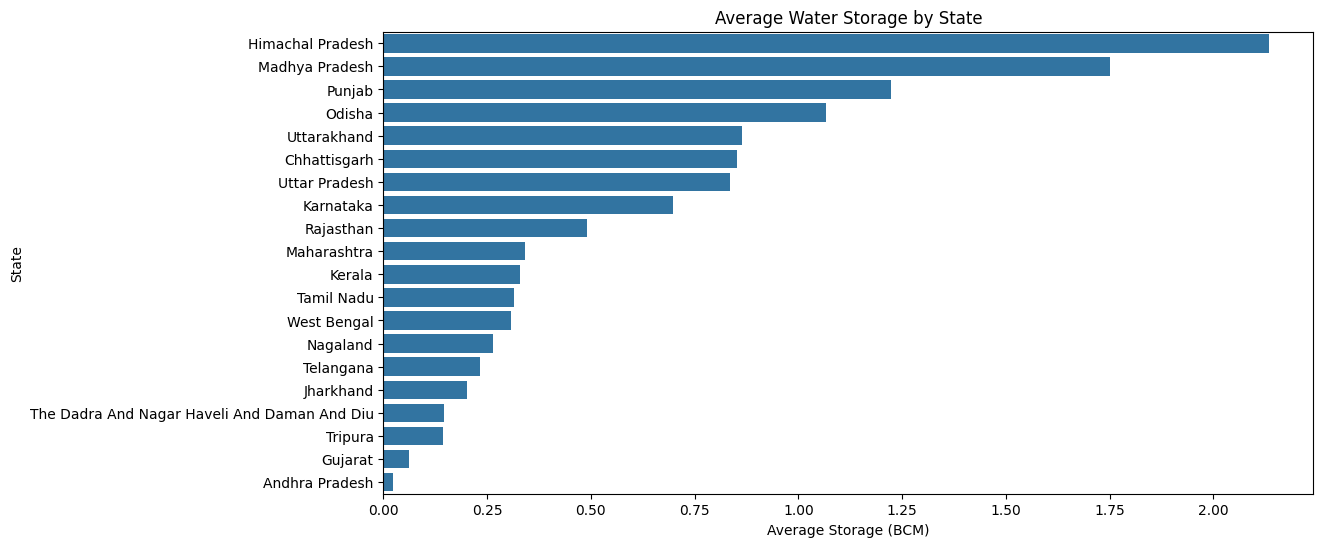

In [273]:
state_storage = df.groupby('State')['Reservoir_Water_Storage_BCM'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=state_storage.values, y=state_storage.index)
plt.title("Average Water Storage by State")
plt.xlabel("Average Storage (BCM)")
plt.show()

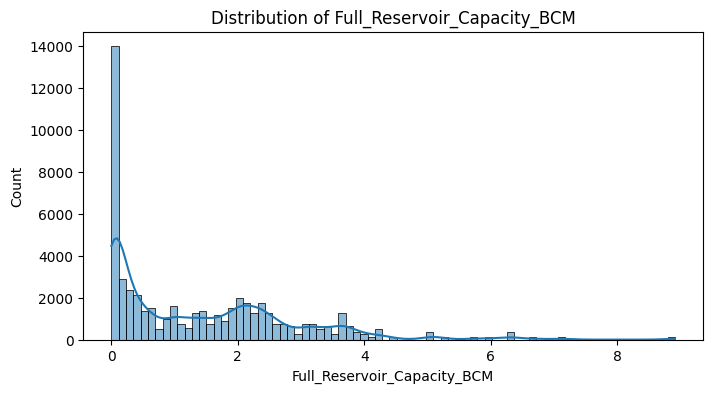

In [274]:
plt.figure(figsize=(8,4))
sns.histplot(np.log1p(df['Full_Reservoir_Capacity_BCM']), kde=True)
plt.title("Distribution of Full_Reservoir_Capacity_BCM")
plt.show()

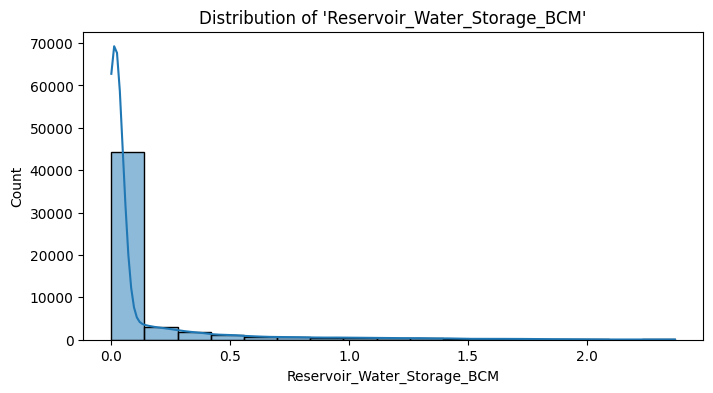

In [275]:
plt.figure(figsize=(8,4))
sns.histplot(np.log1p(df['Reservoir_Water_Storage_BCM']), kde=True)
plt.title("Distribution of 'Reservoir_Water_Storage_BCM'")
plt.show()

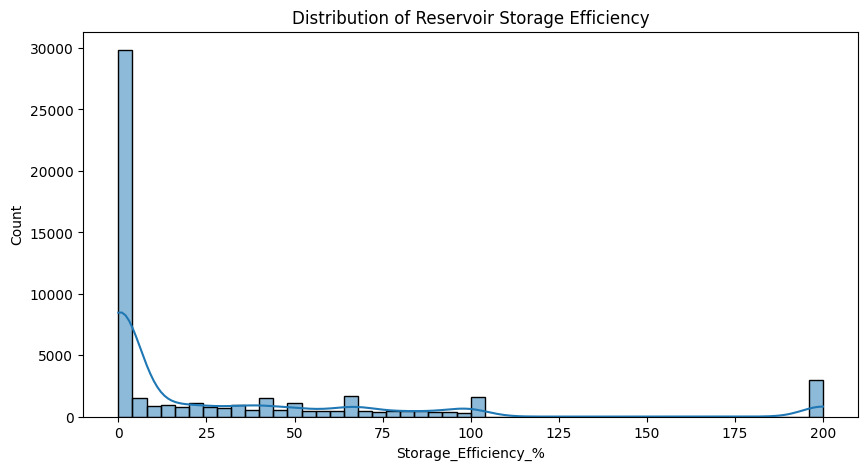

In [276]:
plt.figure(figsize=(10,5))
sns.histplot(df['Storage_Efficiency_%'], bins=50, kde=True)
plt.title("Distribution of Reservoir Storage Efficiency")
plt.show()

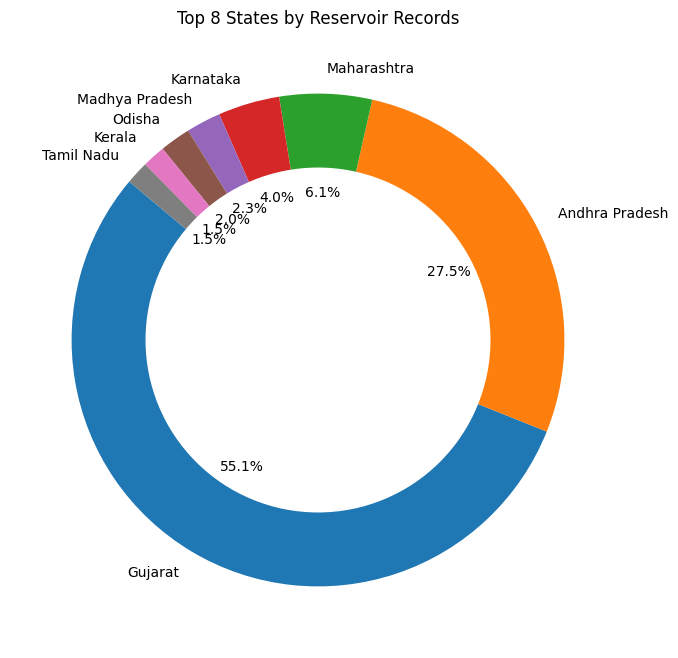

In [277]:
plt.figure(figsize=(8,8))
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=140)
# Draw circle for donut effect
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Top 8 States by Reservoir Records", fontsize=12)
plt.show()

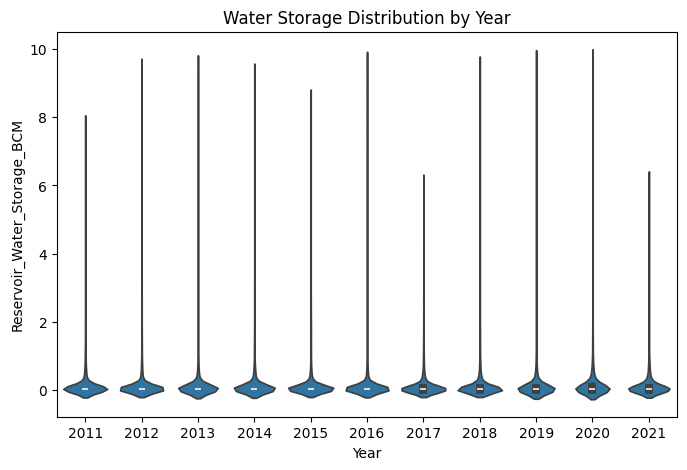

In [278]:
plt.figure(figsize=(8,5))
sns.violinplot(x=df['Year'], y=df['Reservoir_Water_Storage_BCM'])
plt.title("Water Storage Distribution by Year")
plt.show()

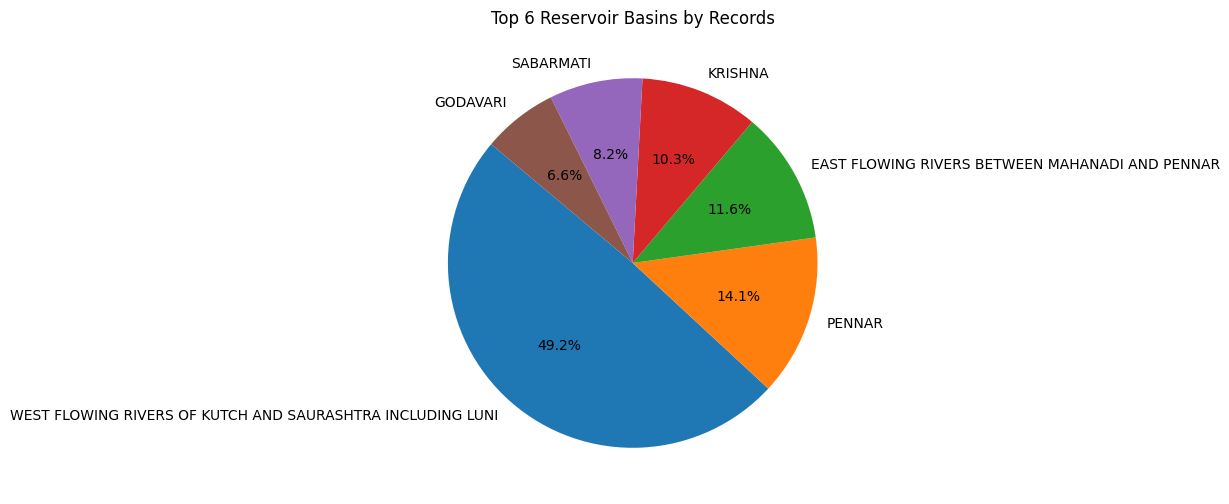

In [279]:
basin_counts = df['Reservoir Basin Name'].value_counts().head(6)
plt.figure(figsize=(6,6))
plt.pie(basin_counts, labels=basin_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 6 Reservoir Basins by Records")
plt.show()

##9. Bivariate and Multivariate Analysis
Bivariate analysis explores relationships between two variables.

Multivariate analysis explores relationships between more than two variables.

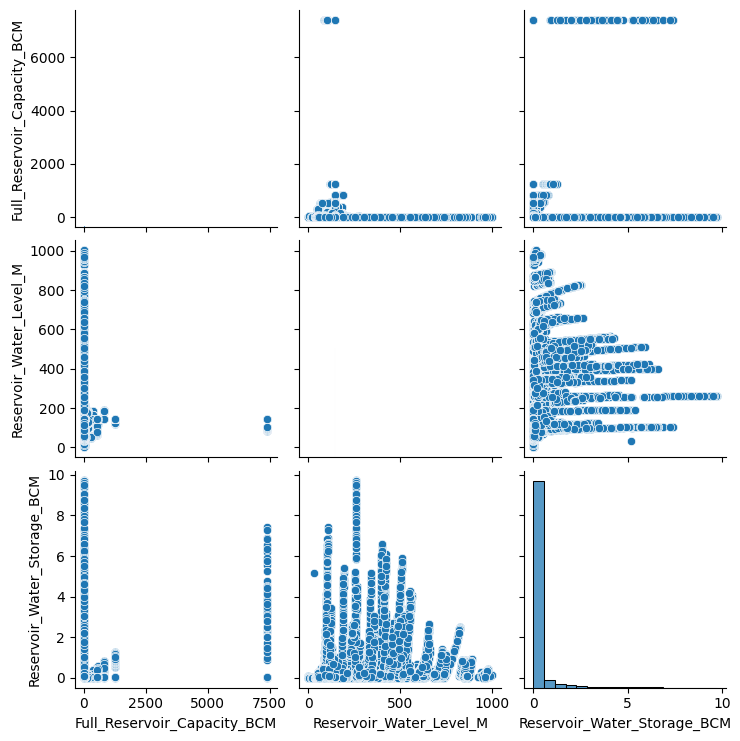

In [280]:
sns.pairplot(df[['Full_Reservoir_Capacity_BCM','Reservoir_Water_Level_M','Reservoir_Water_Storage_BCM']])
plt.show()

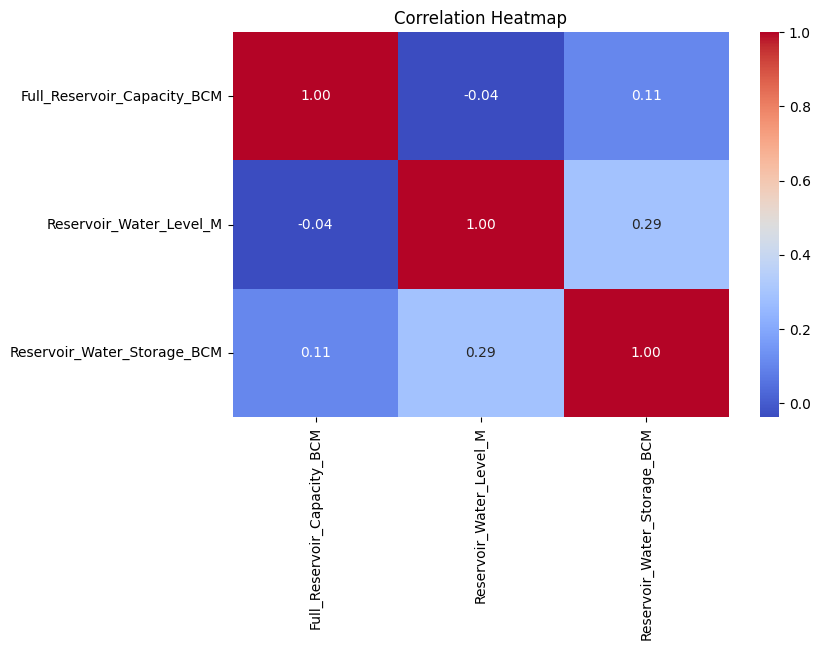

In [281]:
plt.figure(figsize=(8,5))
sns.heatmap(df[['Full_Reservoir_Capacity_BCM','Reservoir_Water_Level_M','Reservoir_Water_Storage_BCM']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

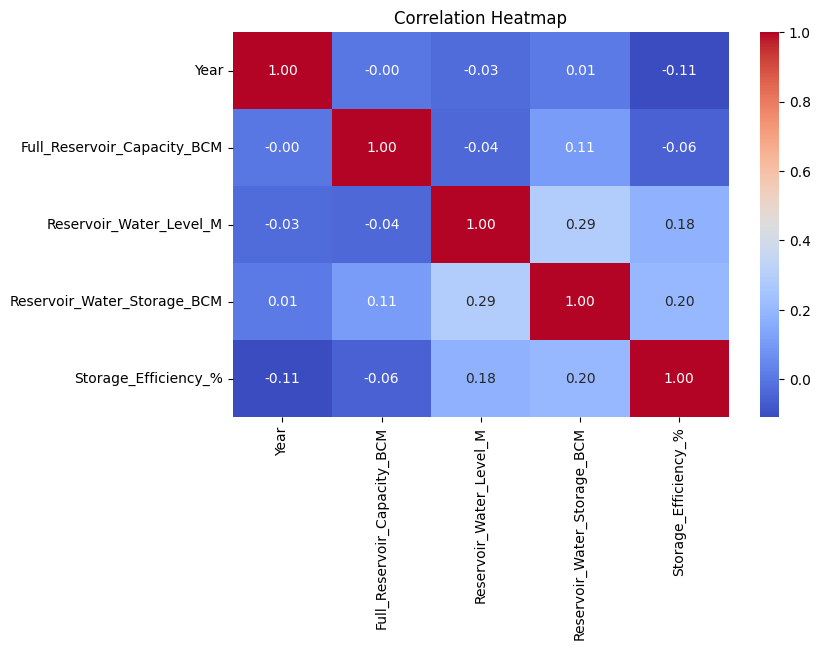

In [282]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


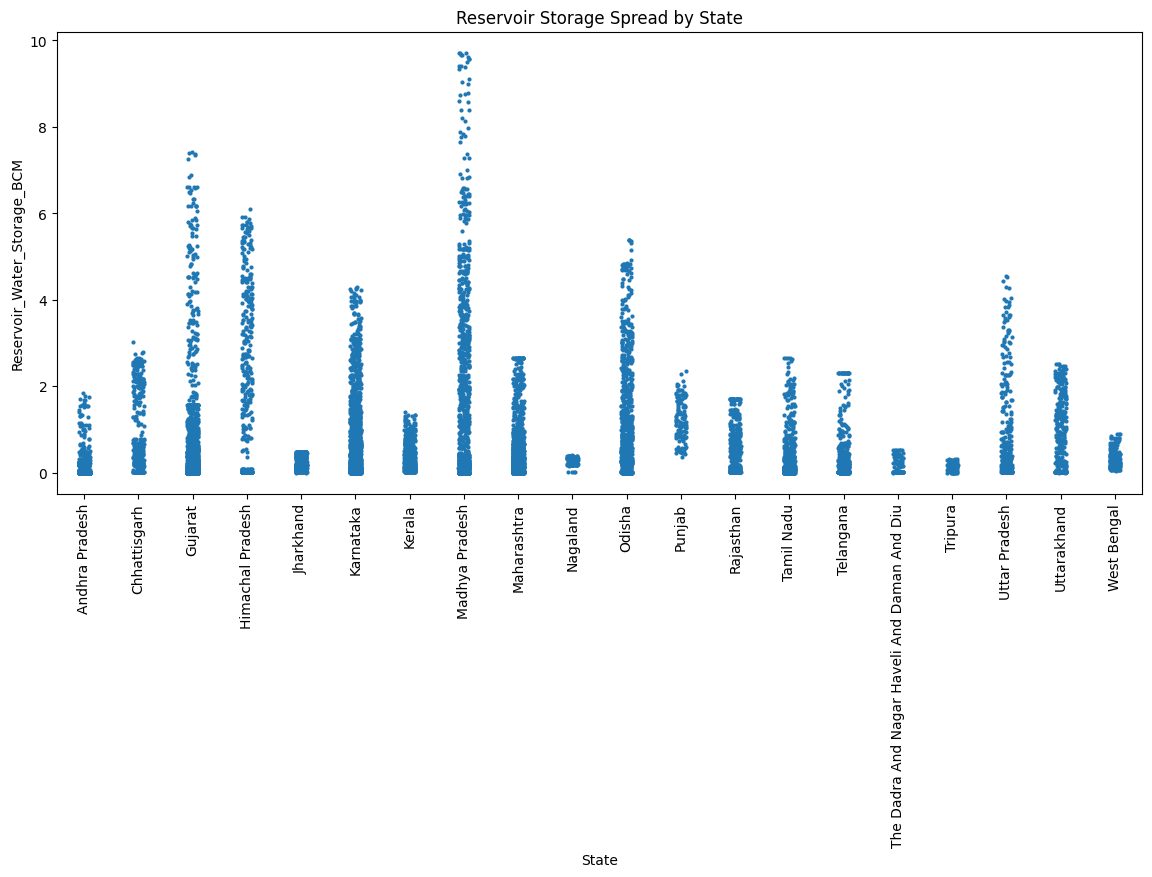

In [283]:
plt.figure(figsize=(14,6))
sns.stripplot(data=df, x='State', y='Reservoir_Water_Storage_BCM', jitter=True, size=3)
plt.xticks(rotation=90)
plt.title("Reservoir Storage Spread by State")
plt.show()


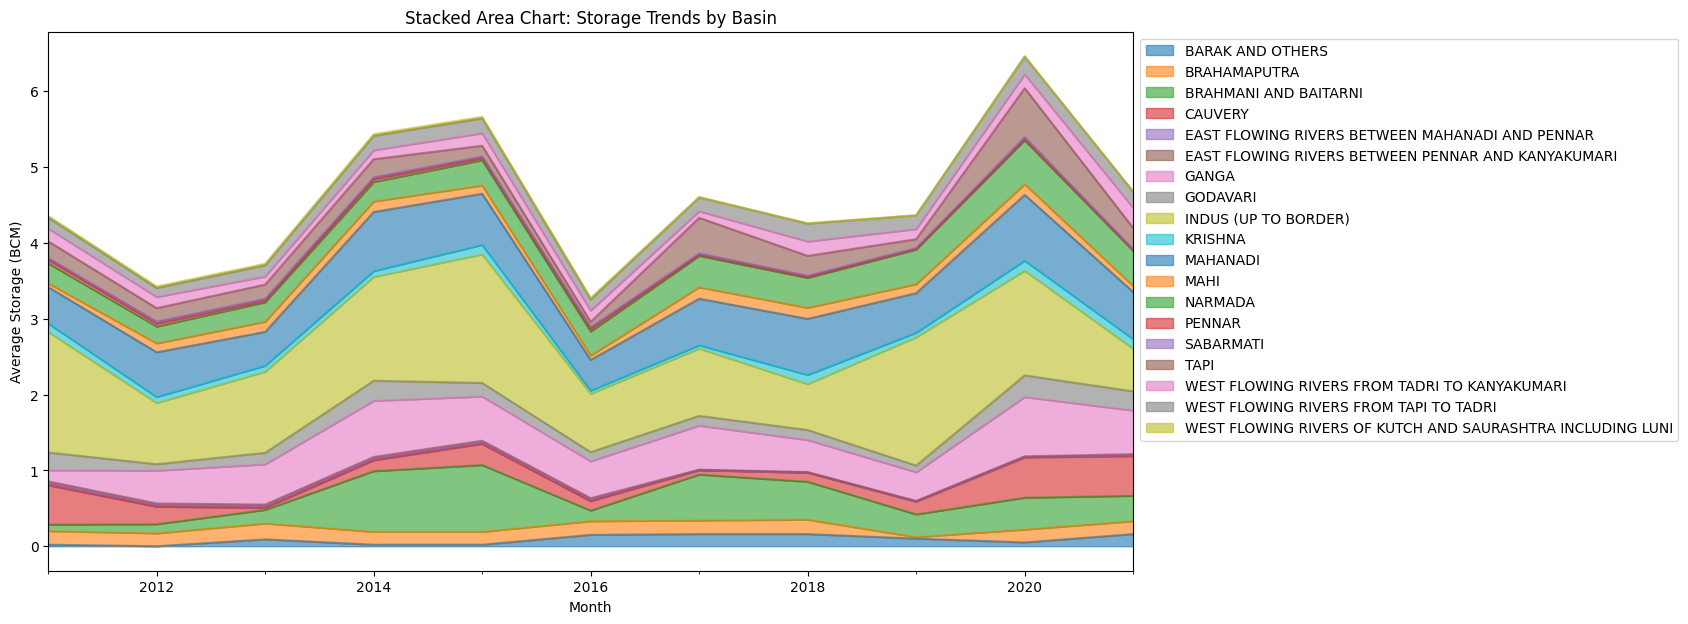

In [284]:
basin_trend = df.groupby(['Month','Reservoir Basin Name'])['Reservoir_Water_Storage_BCM'].mean().unstack().fillna(0)
basin_trend.plot.area(figsize=(14,7), alpha=0.6)
plt.title("Stacked Area Chart: Storage Trends by Basin")
plt.ylabel("Average Storage (BCM)")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

##10. Trend Analysis
Trend analysis is done using line plots to identify changes over time:

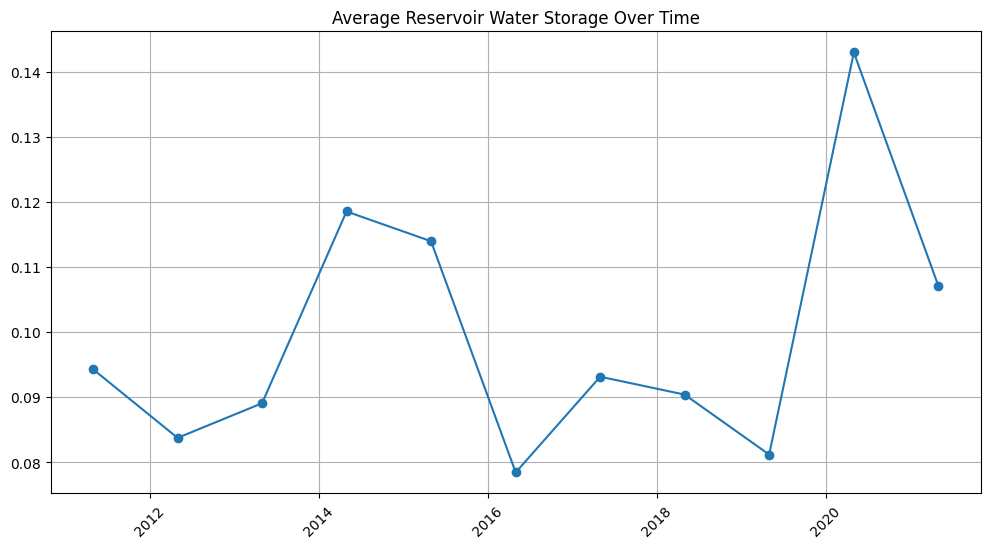

In [285]:
time_df = df.groupby('Month')['Reservoir_Water_Storage_BCM'].mean().reset_index()

plt.figure(figsize=(12,6))
plt.plot(time_df['Month'], time_df['Reservoir_Water_Storage_BCM'], marker='o')
plt.title("Average Reservoir Water Storage Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()

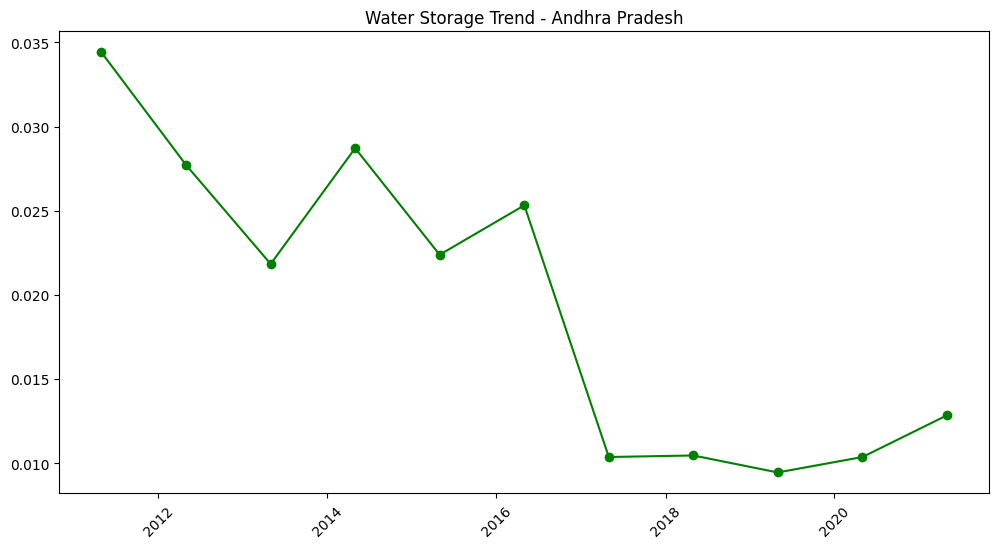

In [286]:
state_df = df[df['State']=="Andhra Pradesh"].groupby('Month')['Reservoir_Water_Storage_BCM'].mean().reset_index()

plt.figure(figsize=(12,6))
plt.plot(state_df['Month'], state_df['Reservoir_Water_Storage_BCM'], color='green', marker='o')
plt.title("Water Storage Trend - Andhra Pradesh")
plt.xticks(rotation=45)
plt.show()

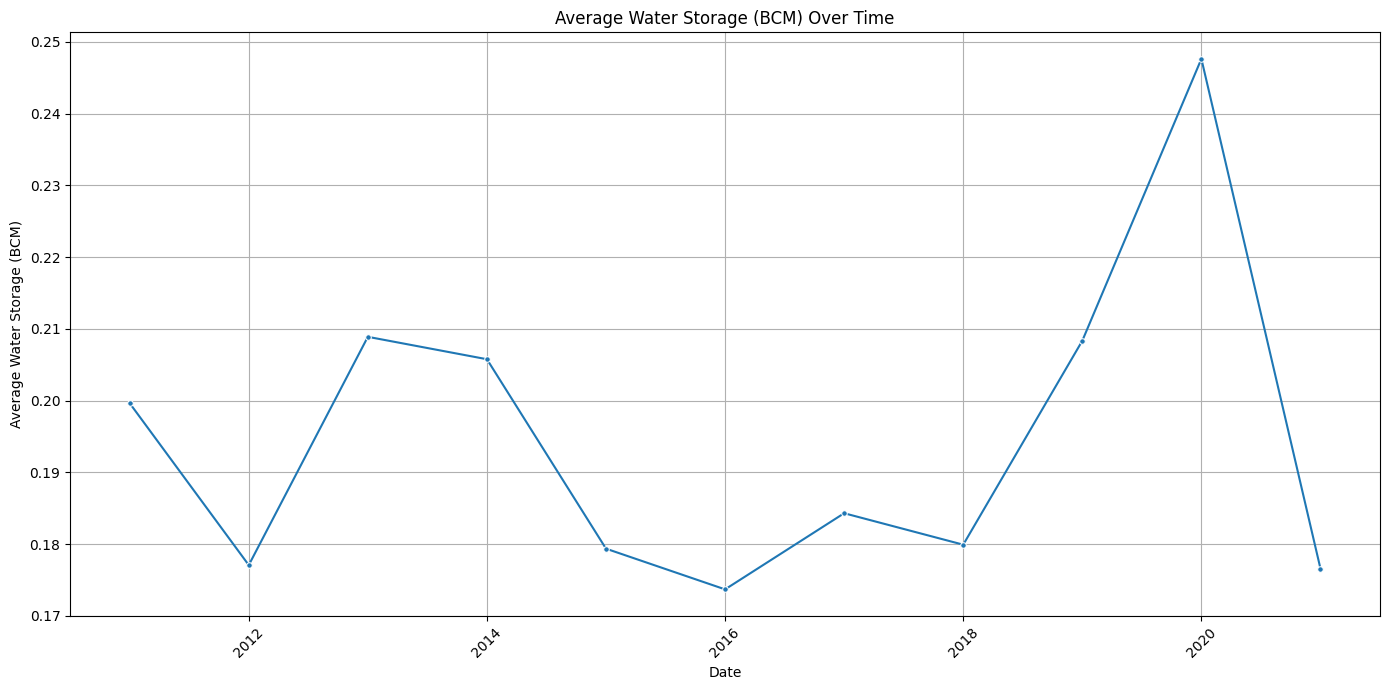

In [287]:
avg_water_storage_over_time = df.groupby('Year')['Reservoir_Water_Storage_BCM'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=avg_water_storage_over_time, x='Year', y='Reservoir_Water_Storage_BCM', marker='o', markersize=4)
plt.title('Average Water Storage (BCM) Over Time')
plt.xlabel('Date')
plt.ylabel('Average Water Storage (BCM)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

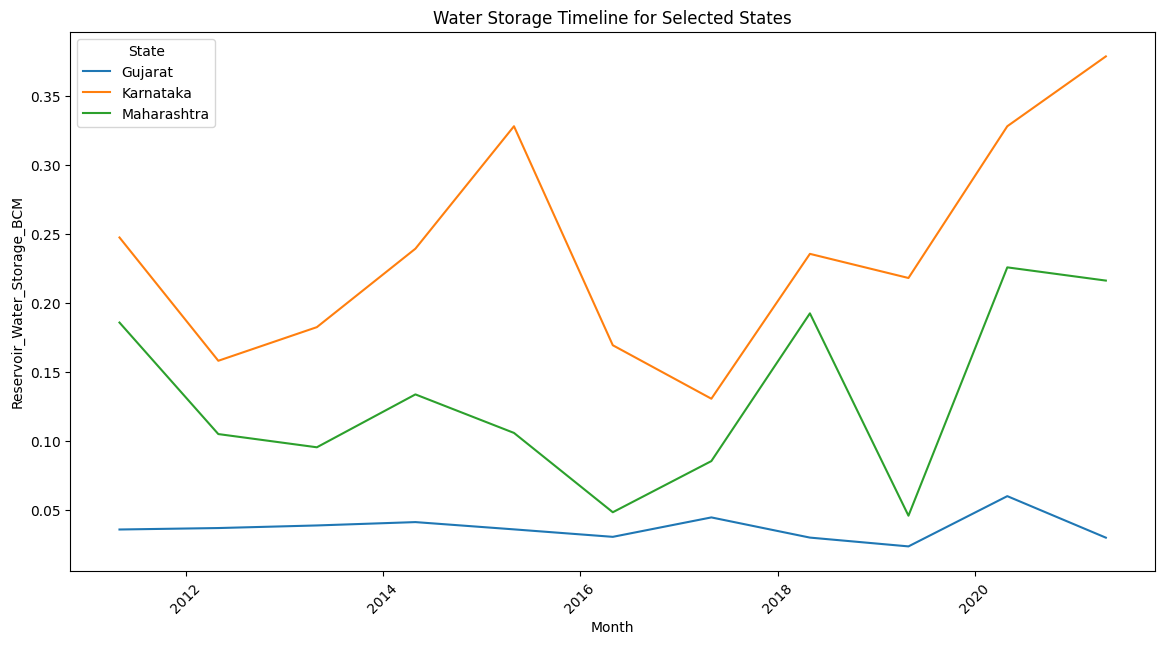

In [288]:
state_timeline = df.groupby(['Month','State'])['Reservoir_Water_Storage_BCM'].mean().reset_index()

plt.figure(figsize=(14,7))
sns.lineplot(data=state_timeline[state_timeline['State'].isin(['Maharashtra','Karnataka','Gujarat'])],
             x='Month', y='Reservoir_Water_Storage_BCM', hue='State')
plt.title("Water Storage Timeline for Selected States")
plt.xticks(rotation=45)
plt.show()
